In [6]:

import pandas as pd  # For data manipulation and analysis.
# Load an Excel file (ensure it's in the same directory as your notebook or provide full path)

file_path = 'C:\\Users\\hp\\Downloads\\SaleData.xlsx'

df = pd.read_excel(file_path, sheet_name='Sheet 3')  # Change 'Sheet1' to the name of your sheet.

# Display first few rows of DataFrame 
print(df.head())

# Get information about DataFrame including data types and non-null counts 
print(df.info())
print(df.describe())
df_cleaned = df.drop_duplicates()


   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  Unnamed: 8  
0  113810.0         NaN  
1   25000.0         NaN  
2   43128.0         NaN  
3    6075.0         NaN  
4   67088.0         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Manager     43 non-null     object        
 3   SalesMan    43 non-null     

In [8]:
total_sales_revenue = df['Sale_amt'].sum()
print(f'Total Sales Revenue: ${total_sales_revenue:.2f}')
sales_by_region = df.groupby('Region')['Sale_amt'].sum().reset_index()
print(sales_by_region)
#group sales according to their region in relation to sales amt


Total Sales Revenue: $1326285.52
    Region  Sale_amt
0  Central  829769.5
1     East  321007.0
2     West  116563.0


In [9]:
best_selling_items = df.groupby('Item').agg({'Sale_amt': sum, 'Units': sum}).reset_index().sort_values(by='Sale_amt', ascending=False)
print(best_selling_items)
# groupby best selling items and units



           Item  Sale_amt  Units
3    Television  819432.0  684.0
2  Home Theater  361000.0  722.0
0    Cell Phone   62550.0  278.0
4   Video Games   23107.5  395.0
1          Desk    1250.0   10.0


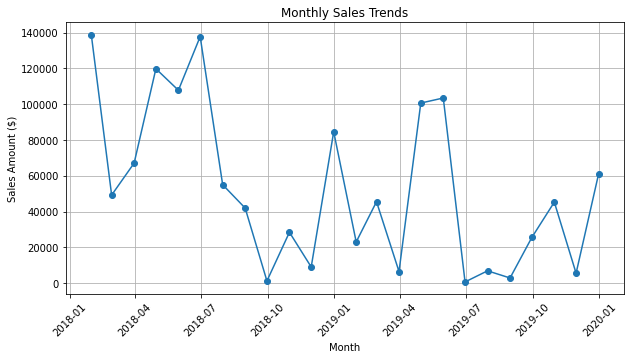

In [10]:
monthly_sales_trends = df.resample('M', on='OrderDate')['Sale_amt'].sum().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales_trends['OrderDate'], monthly_sales_trends['Sale_amt'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [11]:
top_managers_performance = df.groupby('Manager')['Sale_amt'].sum().reset_index().sort_values(by='Sale_amt', ascending=False)
print(top_managers_performance.head())
# find the top performing managers

   Manager  Sale_amt
2   Martha  472493.0
1  Hermann  365108.5
3  Timothy  229018.0
0  Douglas  200720.0


In [12]:
average_unit_price_per_item = df.groupby(['Item'])[['Unit_price']].mean()
print(average_unit_price_per_item.sort_values(by='Unit_price'))
#average unit price per person


              Unit_price
Item                    
Video Games         58.5
Desk               125.0
Cell Phone         225.0
Home Theater       500.0
Television        1198.0


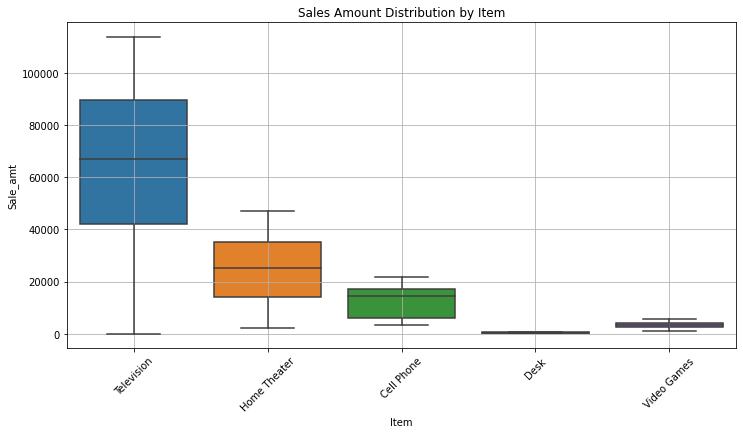

In [13]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Item', y='Sale_amt', data=df)
plt.title('Sales Amount Distribution by Item')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


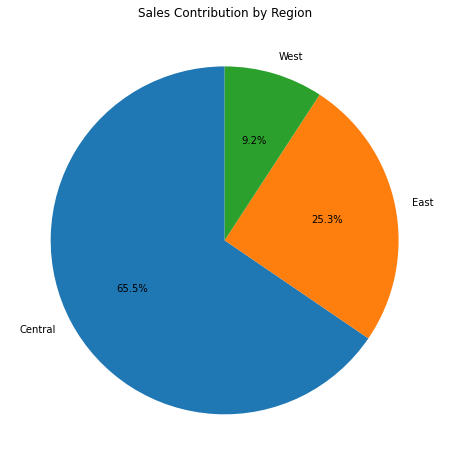

In [14]:
sales_by_region = df.groupby('Region')['Sale_amt'].sum()
plt.figure(figsize=(8, 8))
sales_by_region.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sales Contribution by Region')
plt.ylabel('')
plt.show()


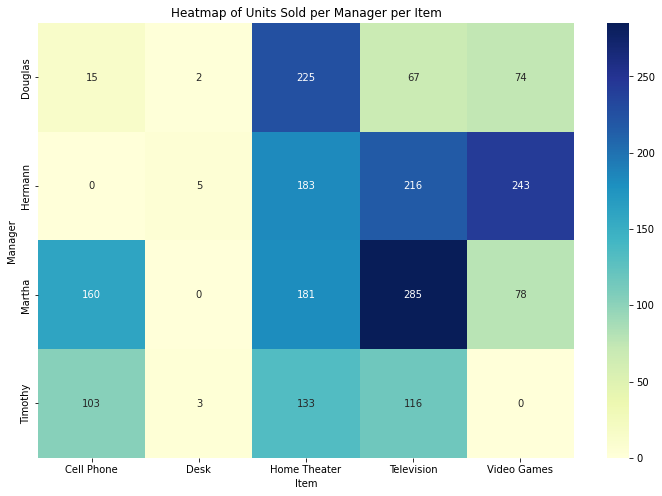

In [15]:
pivot_table = df.pivot_table(values='Units', index='Manager', columns='Item', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Units Sold per Manager per Item')
plt.xlabel('Item')
plt.ylabel('Manager')
plt.show()


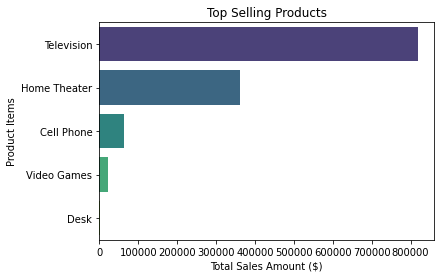

In [20]:
top_n_items = best_selling_items.head(10)

# Horizontal Bar Plot for Top N Products Sold 
sns.barplot(data=top_n_items, x="Sale_amt", y="Item", palette="viridis")
 
# Titles and labels 
plt.title("Top Selling Products")
plt.xlabel("Total Sales Amount ($)")
plt.ylabel("Product Items")
 
 # Show plot 
plt.show()  

